In [72]:
import torch
import torch.utils.data
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F


import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

import numpy as np
import pandas as pd

#needed to preprocess the dataset
from sklearn import preprocessing
from sklearn.metrics import accuracy_score



from tqdm.notebook import tqdm

#general
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)



"""
X1 = torch.randn(1000, 50)
X2 = torch.randn(1000, 50) + 1.5
X = torch.cat([X1, X2], dim=0)
Y1 = torch.zeros(1000, 1)
Y2 = torch.ones(1000, 1)
Y = torch.cat([Y1, Y2], dim=0)
print(X.size())
print(Y.size()) 
"""

'\nX1 = torch.randn(1000, 50)\nX2 = torch.randn(1000, 50) + 1.5\nX = torch.cat([X1, X2], dim=0)\nY1 = torch.zeros(1000, 1)\nY2 = torch.ones(1000, 1)\nY = torch.cat([Y1, Y2], dim=0)\nprint(X.size())\nprint(Y.size()) \n'

In [73]:
df = pd.read_csv('UNSW_NB15_training-set.csv').drop(columns=['proto','state','service','attack_cat']).set_index('id')
df_val, df_train = df.iloc[0:35000, :], df.iloc[35000:, :]
df_test = pd.read_csv('UNSW_NB15_testing-set.csv').drop(columns=['proto','state','service','attack_cat']).set_index('id')

In [74]:
df_train.shape

(140341, 40)

In [75]:
df_train = df_train.sample(frac=1)

X_train = df_train.drop(columns='label')
y_train = df_train.label

X_val = df_val.drop(columns='label')
y_val = df_val.label

X_test = df_test.drop(columns='label')
y_test = df_test.label

convert to torch tensors

In [76]:
X_train = torch.FloatTensor(X_train.values.astype('float'))
y_train = torch.FloatTensor(y_train.values.astype('float')).reshape((-1,1))

X_val = torch.FloatTensor(X_val.values.astype('float'))
y_val = torch.FloatTensor(y_val.values.astype('float')).reshape((-1,1))

X_test = torch.FloatTensor(X_test.values.astype('float'))
y_test = torch.FloatTensor(y_test.values.astype('float')).reshape((-1,1))

# Model

In [77]:
# define NN architecture
class Net(nn.Module):
    
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dout = nn.Dropout(0.5)
        
        self.fc3 = nn.Linear(64, 32)
        self.relu3 = nn.ReLU()
        self.dout = nn.Dropout(0.5)
        
        self.out = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        a1 = self.fc1(x)
        h1 = self.relu1(a1)
        dout1 = self.dout(h1)
        
        a2 = self.fc2(dout1)
        h2 = self.relu2(a2)
        dout2 = self.dout(h2)
        
        a3 = self.fc3(dout2)
        h3 = self.relu3(a3)
        dout3 = self.dout(h3)
        
        a4= self.out(dout3)
        y = self.sigmoid(a4)
        return y

In [47]:
def train_epoch(model, opt, criterion, batch_size):
    model.train()
    losses = []
    for beg_i in range(0, X_train.size(0), batch_size):
        x_batch = X_train[beg_i:beg_i + batch_size, :]
        y_batch = y_train[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

In [ ]:
def test(X_test,y_test):
    y_pred = net(X_test)
    y_pred = y_pred.detach().numpy().flatten()
    y_pred = y_pred == 1
    y_true = y_test.numpy().flatten(); y_true = y_true == 1
    return accuracy_score(y_true, y_pred)

In [64]:
input_size=39

net = Net(input_size)
opt = optim.Adam(net.parameters(), lr=0.001)
criterion = nn.BCELoss()
e_losses = []
num_epochs = 80
for e in tqdm(range(num_epochs)):
    e_losses.append([train_epoch(net, opt, criterion)])

<IPython.core.display.Javascript object>


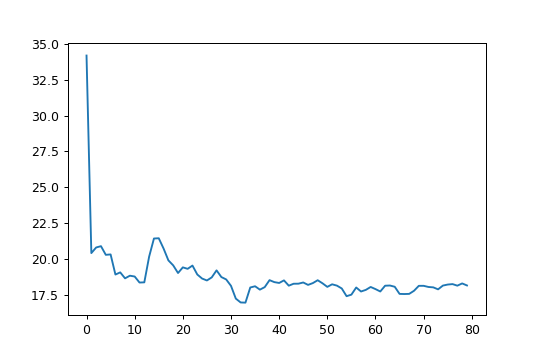

In [65]:
loss_per_epoch = [np.mean(loss_per_epoch) for loss_per_epoch in e_losses]
plt.plot(loss_per_epoch)

# Loop over dataframe and get statistics

In [69]:
lr=[0.001,0.005,0.01,0.05,0.1,0.2,
    0.001,0.005,0.01,0.05,0.1,0.2,
    0.001,0.005,0.01,0.05,0.1,0.2,
    0.001,0.005,0.01,0.05,0.1,0.2,
    0.001,0.005,0.01,0.05,0.1,0.2,
    0.001,0.005,0.01,0.05,0.1,0.2,
    0.001,0.005,0.01,0.05,0.1,0.2,
    0.001,0.005,0.01,0.05,0.1,0.2,  
    0.001,0.005,0.01,0.05,0.1,0.2]

epochs=[1000,1000,1000,1000,1000,1000, 
        500,500,500,500,500,500, 
        100,100,100,100,100,100,
        1000,1000,1000,1000,1000,1000, 
        500,500,500,500,500,500,
        100,100,100,100,100,100,
        1000,1000,1000,1000,1000,1000,     
        500,500,500,500,500,500,
       100,100,100,100,100,100]
batch=[100,100,100,100,100,100,
      100,100,100,100,100,100,
      100,100,100,100,100,100,
      500,500,500,500,500,500,
      500,500,500,500,500,500,
      500,500,500,500,500,500,
      1000,1000,1000,1000,1000,1000,
      1000,1000,1000,1000,1000,1000,
      1000,1000,1000,1000,1000,1000,
      ]

In [89]:
df_stats = pd.DataFrame(columns = ['batch','epochs','lr','out_loss_per_epoch', 'out_accuracy_val_set'])
df_stats['epochs'] = epochs
df_stats['batch'] = batch
df_stats['lr'] = lr
df_stats.head()

,batch,epochs,lr,out_loss_per_epoch,out_accuracy_val_set
0,100,1000,0.001,NaN,NaN
1,100,1000,0.005,NaN,NaN
2,100,1000,0.010,NaN,NaN
3,100,1000,0.050,NaN,NaN
4,100,1000,0.100,NaN,NaN


In [ ]:
for index, row in df_stats.iterrows():
    print("Row number is  {}".format(index))
    #reset everything
    criterion = nn.BCELoss()
    opt = optim.Adam(net.parameters(), lr=row.lr)
    net = Net(input_size)
    
    e_losses = []
    loss_per_epoch = []

    for epoch in range(row.epochs):
        e_losses.append([train_epoch(net, opt, criterion, row.batch)])
    
    loss_per_epoch = [np.mean(loss_per_epoch) for loss_per_epoch in e_losses]    
    
    #update the dataframe with the losses and accuracy
    df_stats.loc[index, 'out_loss_per_epoch'] = loss_per_epoch
    df_stats.loc[index, 'out_accuracy_val_set'] = test(X_val,y_val)
    

Row number is  0
